In [1]:
!pip uninstall -y Pillow
!pip install --no-cache-dir Pillow

Found existing installation: pillow 10.2.0
Uninstalling pillow-10.2.0:
  Successfully uninstalled pillow-10.2.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 11.4 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vietocr 0.3.13 requires pillow==10.2.0, but you have pillow 11.0.0 which is incompatible.
ydata-profiling 4.10.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.


In [2]:
!pip install vietocr
!pip install torch torchvision
!pip install opencv-python-headless

  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.10.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.


In [4]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [5]:
config = Cfg.load_config_from_name('vgg_transformer')

In [6]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [7]:
detector = Predictor(config)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
18533it [00:16, 1155.84it/s]
/opt/conda/lib/python3.10/site-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary object

In [8]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2024-11-22 02:39:11--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: 'data_line.zip'

data_line.zip       100%[===================>]  58.38M  10.6MB/s    in 6.6s    

2024-11-22 02:39:18 (8.88 MB/s) - 'data_line.zip' saved [61212284/61212284]



In [9]:
! unzip -qq -o ./data_line.zip

In [10]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

In [11]:
dataset_params = {
    'name':'hw', # tên dataset do bạn tự đặt
    'data_root':'./data_line/', # thư mục chứa dữ liệu bao gồm ảnh và nhãn
    'train_annotation':'train_line_annotation.txt', # ảnh và nhãn tập train
    'valid_annotation':'test_line_annotation.txt' # ảnh và nhãn tập test
}
params = {
    'print_every':200, # hiển thị loss mỗi 200 iteration 
    'valid_every':10000, # đánh giá độ chính xác mô hình mỗi 10000 iteraction
    'iters':20000, 
    'export':'./weights/transformerocr.pth', # lưu model được huấn luyện tại này
    'metrics': 10000 
}
config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [12]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 10000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 3

In [13]:
trainer = Trainer(config, pretrained=True)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/opt/conda/lib/python3.10/site-packages/vietocr/model/trainer.py:278: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed t

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


Create train_hw: 100%|████████████████████████████████████████| 5483/5483 [00:03<00:00, 1526.48it/s]


Created dataset with 5482 samples


Create valid_hw: 100%|████████████████████████████████████████| 1813/1813 [00:01<00:00, 1606.12it/s]


Created dataset with 1812 samples


valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 154325.72it/s]


In [14]:
trainer.config.save('config.yml')

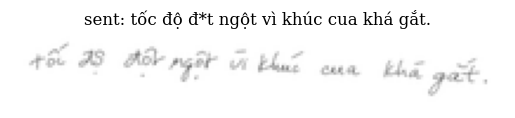

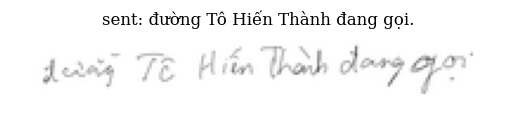

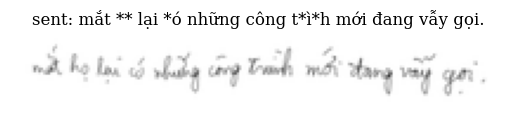

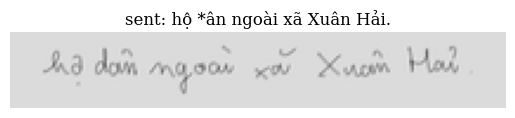

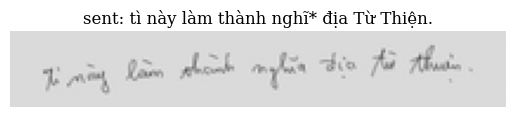

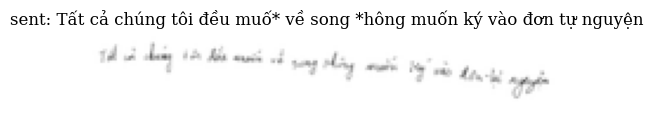

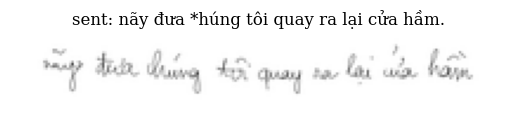

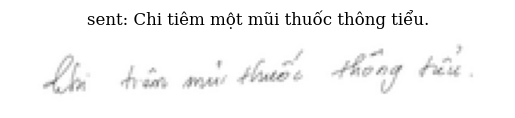

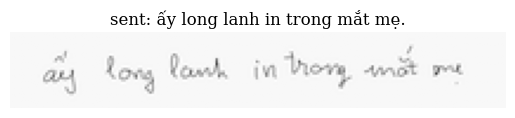

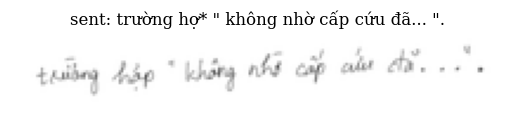

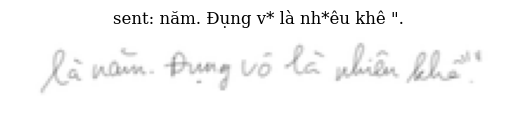

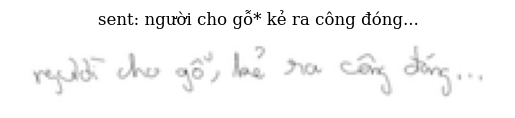

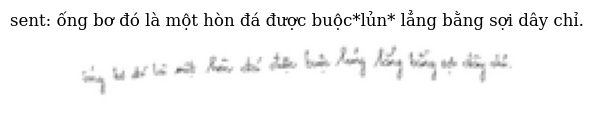

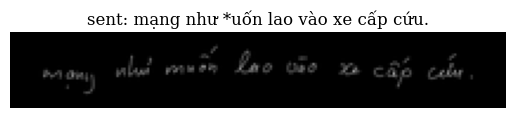

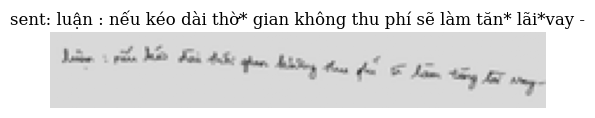

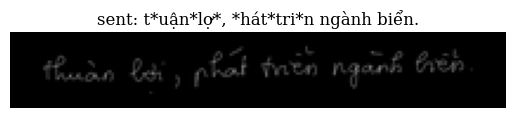

In [15]:
trainer.visualize_dataset()

In [16]:
trainer.train()

iter: 000200 - train loss: 1.574 - lr: 1.91e-05 - load time: 0.55 - gpu time: 82.38
iter: 000400 - train loss: 1.302 - lr: 3.95e-05 - load time: 0.36 - gpu time: 81.39
iter: 000600 - train loss: 1.174 - lr: 7.14e-05 - load time: 0.36 - gpu time: 81.40
iter: 000800 - train loss: 1.113 - lr: 1.12e-04 - load time: 0.74 - gpu time: 81.00
iter: 001000 - train loss: 1.057 - lr: 1.56e-04 - load time: 0.36 - gpu time: 81.64
iter: 001200 - train loss: 1.028 - lr: 2.01e-04 - load time: 0.43 - gpu time: 81.07
iter: 001400 - train loss: 0.989 - lr: 2.41e-04 - load time: 0.74 - gpu time: 81.46
iter: 001600 - train loss: 0.969 - lr: 2.73e-04 - load time: 0.36 - gpu time: 81.18
iter: 001800 - train loss: 0.933 - lr: 2.93e-04 - load time: 0.41 - gpu time: 81.67
iter: 002000 - train loss: 0.925 - lr: 3.00e-04 - load time: 0.34 - gpu time: 81.50
iter: 002200 - train loss: 0.904 - lr: 3.00e-04 - load time: 0.69 - gpu time: 81.37
iter: 002400 - train loss: 0.876 - lr: 3.00e-04 - load time: 0.39 - gpu time

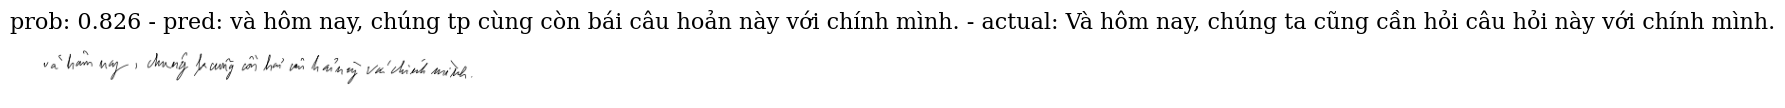

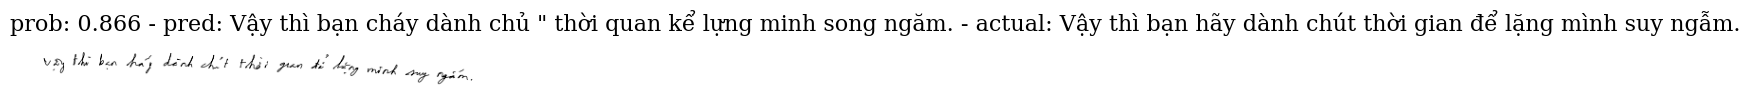

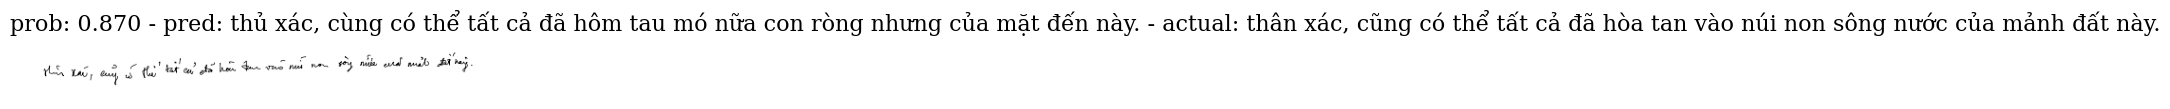

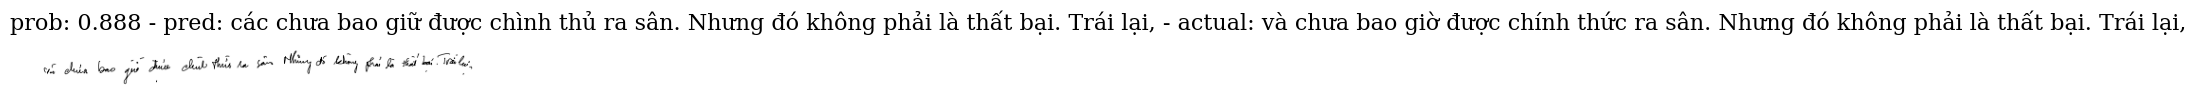

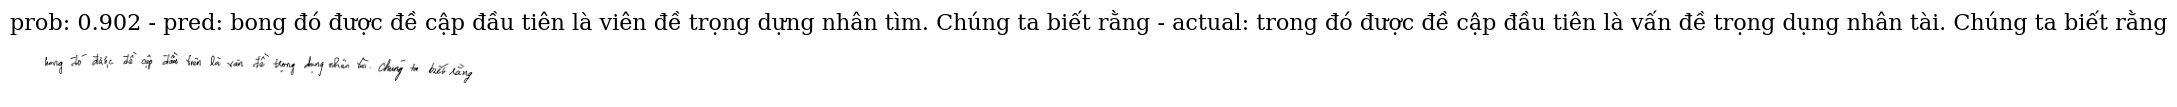

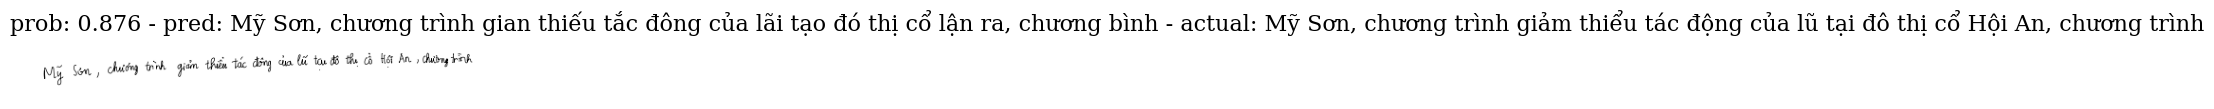

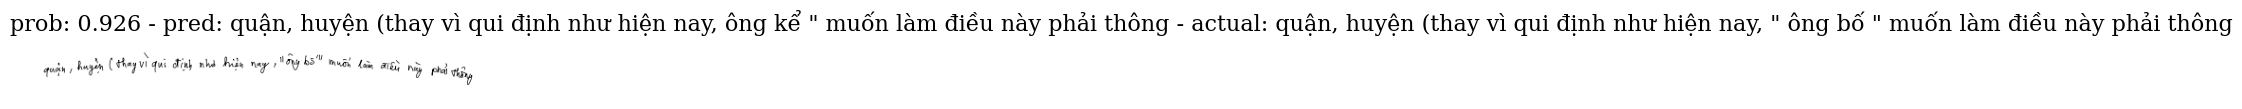

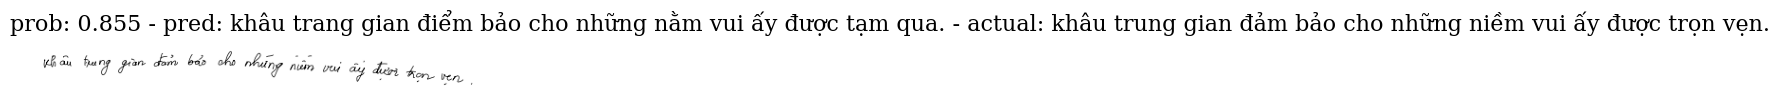

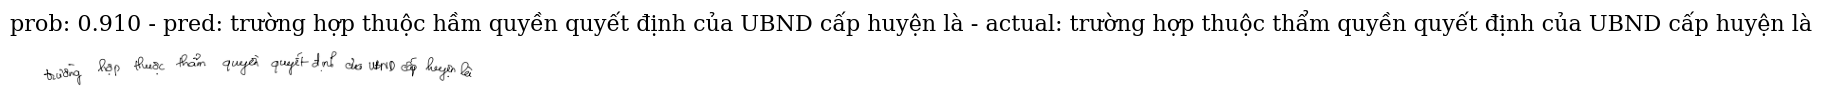

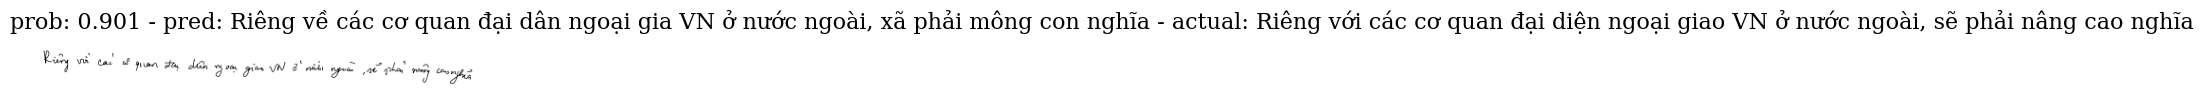

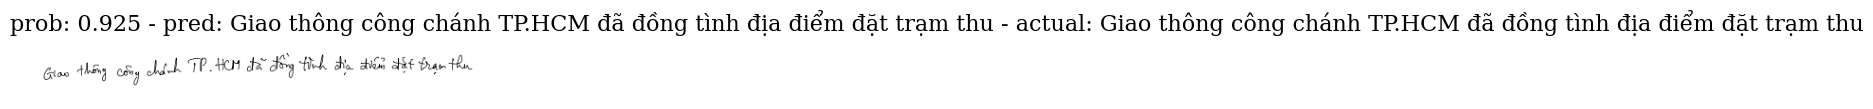

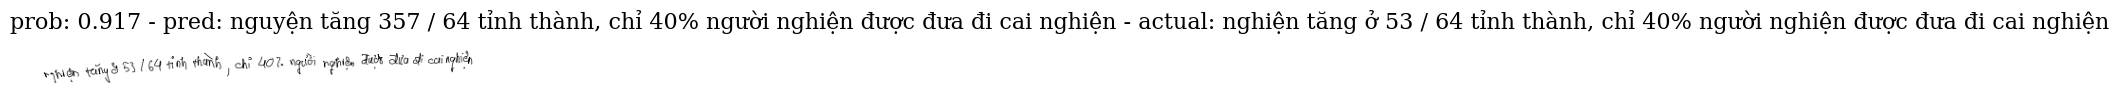

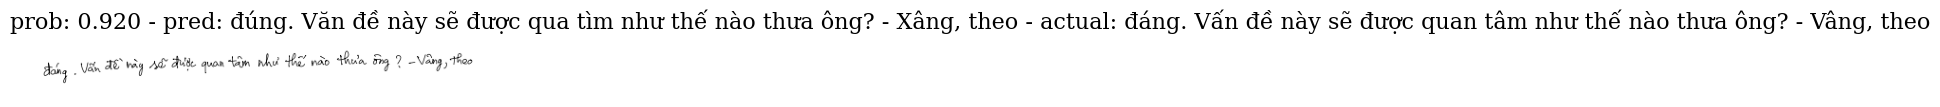

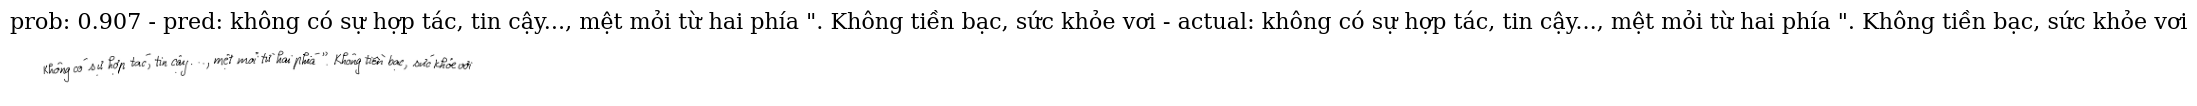

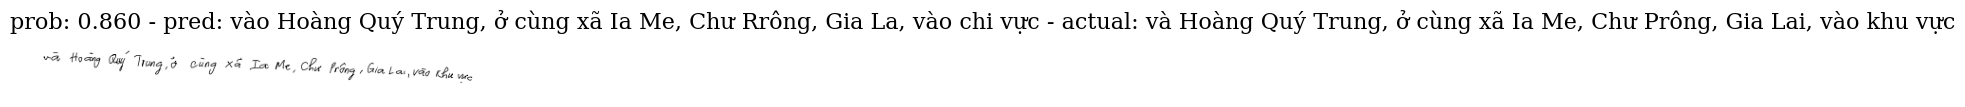

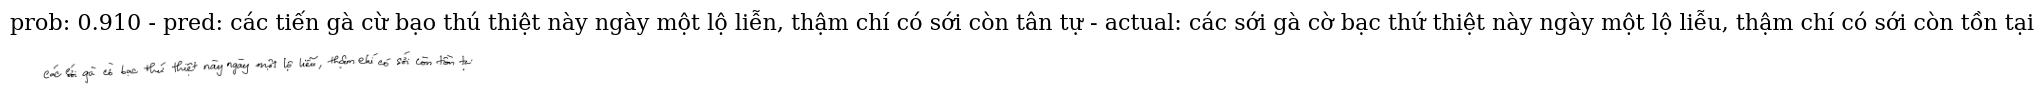

In [17]:
trainer.visualize_prediction()

In [18]:
trainer.precision()

(0.0859375, 0.6491082)

In [19]:
trainer.config.save('config.yml')

Test model

In [20]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [21]:
config = Cfg.load_config_from_name('vgg_transformer')
config['weights'] = './weights/transformerocr.pth'
config['device'] = 'cuda:0'

In [22]:
detector = Predictor(config)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:02<00:00, 193MB/s]  
/opt/conda/lib/python3.10/site-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you do

**Download transformerocr.pth and config.yml from output** 

In [28]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink('weights/transformerocr.pth')

/kaggle/working


/kaggle/working/weights/transformerocr.pth

In [29]:
FileLink('config.yml')

/kaggle/working/config.yml